In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [52]:
df=pd.read_csv("social_network_ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,56,40342,0
1,46,121308,1
2,32,121081,1
3,25,104045,1
4,38,49698,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              200 non-null    int64
 1   EstimatedSalary  200 non-null    int64
 2   Purchased        200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [3]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<h2>feature selection</h2>

In [4]:
x=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

<h2>feature scaling</h2>

In [6]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x= pd.DataFrame(x_scaled,columns=["Age","EstimatedSalary"])

In [16]:
x.head()

,Age,EstimatedSalary
0,1.378737,-1.120218
1,0.583388,0.851214
2,-0.530100,0.845687
3,-1.086844,0.430879
4,-0.052891,-0.892410


<h2>data validation</h2>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=47)

In [48]:
dt.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,47
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
y_pred=dt.predict(x_test)

In [50]:
print("confusion matrix-\n",confusion_matrix(y_test,y_pred))
print("classification Report-\n",classification_report(y_test,y_pred,zero_division=0))

confusion matrix-
 [[ 8 17]
 [ 8 27]]
classification Report-
               precision    recall  f1-score   support

           0       0.50      0.32      0.39        25
           1       0.61      0.77      0.68        35

    accuracy                           0.58        60
   macro avg       0.56      0.55      0.54        60
weighted avg       0.57      0.58      0.56        60



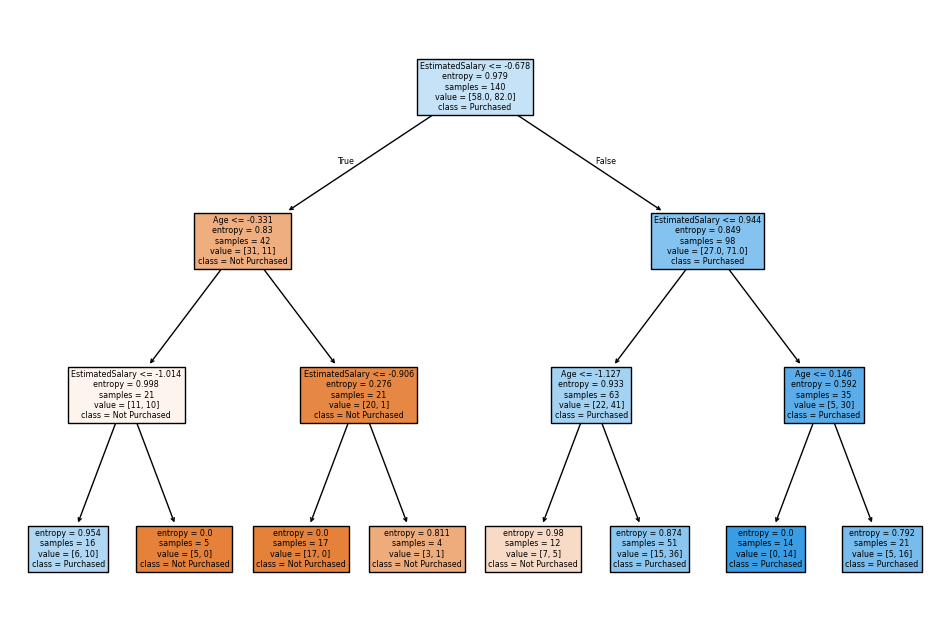

In [51]:
plt.figure(figsize=(12,8))
plot_tree(dt,feature_names=["Age","EstimatedSalary"],class_names=["Not Purchased","Purchased"],filled=True)
plt.show()

<h2>user prediction</h2>

In [54]:
user_input={
    "Age":[int(input("enter your age"))],
    "EstimatedSalary":[int(input("enter your salary"))]
}
user_dataset=pd.DataFrame(user_input)

enter your age 56
enter your salary 40342


In [56]:
pred_user=dt.predict(user_dataset)
print("purchase",pred_user)

purchase [1]
